# Setting up MV

In [1]:
from model.master_transmuter import *
from scrape.scraper import *
from query import *
import unit_tests
import pandas as pd
import numpy as np

In [2]:
mythic_df = pd.read_csv("data/all_vintage_cards-mythic_recent.csv")
rare_df = pd.read_csv("data/all_vintage_cards-rare_recent.csv")
print('Mythic cards: {}'.format(mythic_df.shape[0]))
print('Rare cards: {}'.format(rare_df.shape[0]))

Mythic cards: 568
Rare cards: 4215


In [3]:
mythic_df.sample(10)

,Unnamed: 0,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities,timestamp,price
205,205,7c71065f-6242-4c1b-a2d4-e940d6d4fad7,Champion's Helm,Kaladesh Inventions,Artifact — Equipment,{3},mythic,Equipped creature gets +2/+2.\r\r\nAs long as ...,NaN,NaN,NaN,3.0,mps,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1528467226340,70.0
456,456,75b83fe5-fd00-4532-bc67-07836abfc99c,Lord of the Void,Gatecrash,Creature — Demon,{4}{B}{B}{B},mythic,Flying\r\r\nWhenever Lord of the Void deals co...,7,7,NaN,7.0,gtc,['B'],['B'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542076626929,3.0
397,397,2a0417bf-b735-46d7-9985-2d991051020f,"Mogis, God of Slaughter",Born of the Gods,Legendary Enchantment Creature — God,{2}{B}{R},mythic,Indestructible\r\r\nAs long as your devotion t...,7,5,NaN,4.0,bng,"['B', 'R']","['B', 'R']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542081260069,3.7
88,88,4bc07386-909f-4946-9120-3acb58622e2f,Bontu the Glorified,Amonkhet,Legendary Creature — God,{2}{B},mythic,"Menace, indestructible\r\r\nBontu the Glorifie...",4,6,NaN,3.0,akh,['B'],['B'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542079796425,1.5
377,377,f210adb7-b389-4672-a3eb-0ced9bfe190c,"Narset, Enlightened Master",Khans of Tarkir,Legendary Creature — Human Monk,{3}{U}{R}{W},mythic,"First strike, hexproof\r\r\nWhenever Narset, E...",3,2,NaN,6.0,ktk,"['R', 'U', 'W']","['R', 'U', 'W']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542039685729,0.6
472,472,59d8d22b-d5e7-412e-86e6-b7cd7c71dbb5,Thromok the Insatiable,Planechase 2012,Legendary Creature — Hellion,{3}{R}{G},mythic,"Devour X, where X is the number of creatures d...",0,0,NaN,5.0,pc2,"['G', 'R']","['G', 'R']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542074436062,1.6
499,499,5d393da0-4cb6-4ae8-b747-8e6d0fa7f55a,"Thrun, the Last Troll",Mirrodin Besieged,Legendary Creature — Troll Shaman,{2}{G}{G},mythic,This spell can't be countered.\r\r\nHexproof (...,4,4,NaN,4.0,mbs,['G'],['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,10.1
513,513,c930c9cc-1b64-4f36-afe2-6bf120a74ce2,"Skithiryx, the Blight Dragon",Scars of Mirrodin,Legendary Creature — Dragon Skeleton,{3}{B}{B},mythic,Flying\r\r\nInfect (This creature deals damage...,4,4,NaN,5.0,som,['B'],['B'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,20.8
559,559,6589eaa8-95ec-4c97-8155-185487560ae6,Sharuum the Hegemon,Shards of Alara,Legendary Artifact Creature — Sphinx,{3}{W}{U}{B},mythic,Flying\r\r\nWhen Sharuum the Hegemon enters th...,5,5,NaN,6.0,ala,"['B', 'U', 'W']","['B', 'U', 'W']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1539676800000,0.9
94,94,1045bdc7-6fbb-4b63-9798-a2a993f95bc2,Cavern of Souls,Modern Masters 2017,Land,NaN,mythic,"As Cavern of Souls enters the battlefield, cho...",NaN,NaN,NaN,0.0,mm3,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542082870132,60.5


In [4]:
clean_mythic_df = mythic_df[~pd.isnull(mythic_df['price'])]
clean_rare_df = rare_df[~pd.isnull(rare_df['price'])]

In [5]:
clean_mythic_df.describe()

,Unnamed: 0,cmc,timestamp,price
count,568.000000,568.000000,5.680000e+02,568.000000
mean,283.500000,4.554577,1.539819e+12,23.024120
std,164.111751,2.336848,4.992627e+09,50.145228
min,0.000000,0.000000,1.523362e+12,0.200000
25%,141.750000,3.000000,1.542027e+12,1.100000
50%,283.500000,5.000000,1.542058e+12,4.000000
75%,425.250000,6.000000,1.542087e+12,14.325000
max,567.000000,12.000000,1.542101e+12,450.000000


In [6]:
clean_rare_df.describe()

,Unnamed: 0,loyalty,cmc,timestamp,price
count,4215.000000,4.000000,4215.000000,4.215000e+03,4215.000000
mean,2107.000000,4.500000,3.927402,1.540199e+12,6.058197
std,1216.910021,1.290994,2.059381,6.214516e+09,37.014310
min,0.000000,3.000000,0.000000,1.441591e+12,0.100000
25%,1053.500000,3.750000,3.000000,1.542026e+12,0.200000
50%,2107.000000,4.500000,4.000000,1.542084e+12,0.500000
75%,3160.500000,5.250000,5.000000,1.542096e+12,2.500000
max,4214.000000,6.000000,16.000000,1.542108e+12,1000.000000


## Price EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

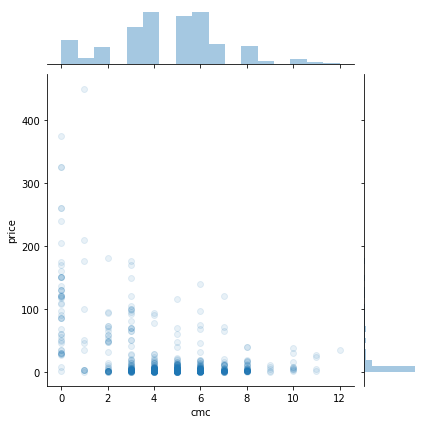

In [8]:
sns.jointplot(clean_mythic_df['cmc'], clean_mythic_df['price'], joint_kws={'alpha':0.1})

(0, 80)

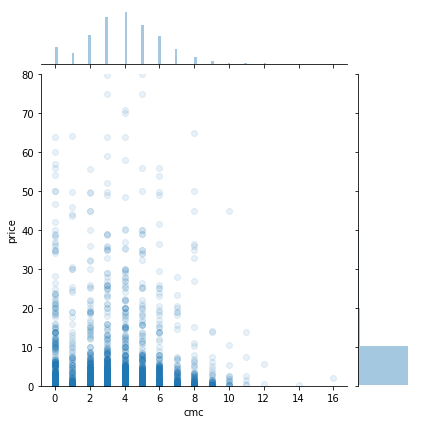

In [9]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})
plt.ylim(0,80)

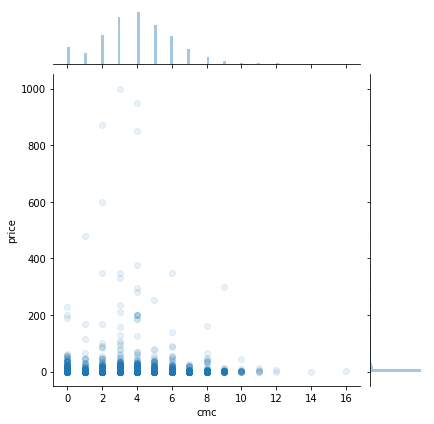

In [10]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})

### TRANSFORM

In [11]:
aberrant_researcher = CreatureFeatureTransformer()

In [12]:
perfected_form = aberrant_researcher.transform(clean_mythic_df)

In [13]:
perfected_form.sample(10)

,Unnamed: 0,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,...,colors,reprint,layout,legalities,timestamp,price,pt_type,p:t,avg_pt,cmc:apt
108,108,791fdd9a-0ab6-4db9-84f9-859d2d862518,"Ajani, Valiant Protector",Aether Revolt,Legendary Planeswalker — Ajani,{4}{G}{W},mythic,+2: Put two +1/+1 counters on up to one target...,0,0,...,"['G', 'W']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542044549449,5.5,none,NaN,NaN,NaN
476,476,e390bc78-31ad-4131-a9e4-93ee0c7c2f34,"Bruna, Light of Alabaster",Avacyn Restored,Legendary Creature — Angel,{3}{W}{W}{U},mythic,"Flying, vigilance\r\r\nWhenever Bruna, Light o...",5,5,...,"['U', 'W']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542025533879,1.0,static,1.0,5.0,1.20
166,166,16697bb0-55db-4210-b71e-31c72c3a8d73,Vedalken Shackles,Kaladesh Inventions,Artifact,{3},mythic,You may choose not to untap Vedalken Shackles ...,0,0,...,[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1528417917077,70.0,none,NaN,NaN,NaN
22,22,39bcc48a-efdb-443f-93b8-bc0b54aa0eb8,"Huatli, Radiant Champion",Rivals of Ixalan,Legendary Planeswalker — Huatli,{2}{G}{W},mythic,"+1: Put a loyalty counter on Huatli, Radiant C...",0,0,...,"['G', 'W']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542070311055,4.5,none,NaN,NaN,NaN
1,1,eb2b7388-ac6b-45c0-a5cc-da6450724b59,"Teferi, Timebender",Dominaria,Legendary Planeswalker — Teferi,{4}{W}{U},mythic,+2: Untap up to one target artifact or creatur...,0,0,...,"['U', 'W']",False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780379,5.0,none,NaN,NaN,NaN
87,87,06a91cf5-4eab-4d9b-90bd-fb933bb00540,Cruel Reality,Amonkhet,Enchantment — Aura Curse,{5}{B}{B},mythic,Enchant player\r\r\nAt the beginning of enchan...,0,0,...,['B'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1538537396426,0.6,none,NaN,NaN,NaN
416,416,6daaa97a-6864-4897-ad42-92a68dc6980d,Rampaging Baloths,Commander 2013,Creature — Beast,{4}{G}{G},mythic,Trample\r\r\nLandfall — Whenever a land enters...,6,6,...,['G'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542066546007,0.6,static,1.0,6.0,1.00
222,222,0cb33b46-4d1b-4f97-bfdc-d815aee111da,Mana Crypt,Eternal Masters,Artifact,{0},mythic,"At the beginning of your upkeep, flip a coin. ...",0,0,...,[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542100603988,119.2,none,NaN,NaN,NaN
489,489,cd114ec3-d286-4c70-a122-3043bc53cc88,Batterskull,New Phyrexia,Artifact — Equipment,{5},mythic,Living weapon (When this Equipment enters the ...,0,0,...,[],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542096000000,16.3,none,NaN,NaN,NaN
350,350,dc4850e4-acb9-458d-952f-b3952cab2a5b,Torrent Elemental,Fate Reforged,Creature — Elemental,{4}{U},mythic,Flying\r\r\nWhenever Torrent Elemental attacks...,3,5,...,['U'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1542087238670,0.3,static,0.6,4.0,1.25


In [14]:
perfected_form[perfected_form['pt_type']=='static'].columns

Index(['Unnamed: 0', 'id', 'cardname', 'setname', 'type_line', 'mana_cost',
       'rarity', 'oracle_text', 'power', 'toughness', 'loyalty', 'cmc', 'set',
       'color_identity', 'colors', 'reprint', 'layout', 'legalities',
       'timestamp', 'price', 'pt_type', 'p:t', 'avg_pt', 'cmc:apt'],
      dtype='object')

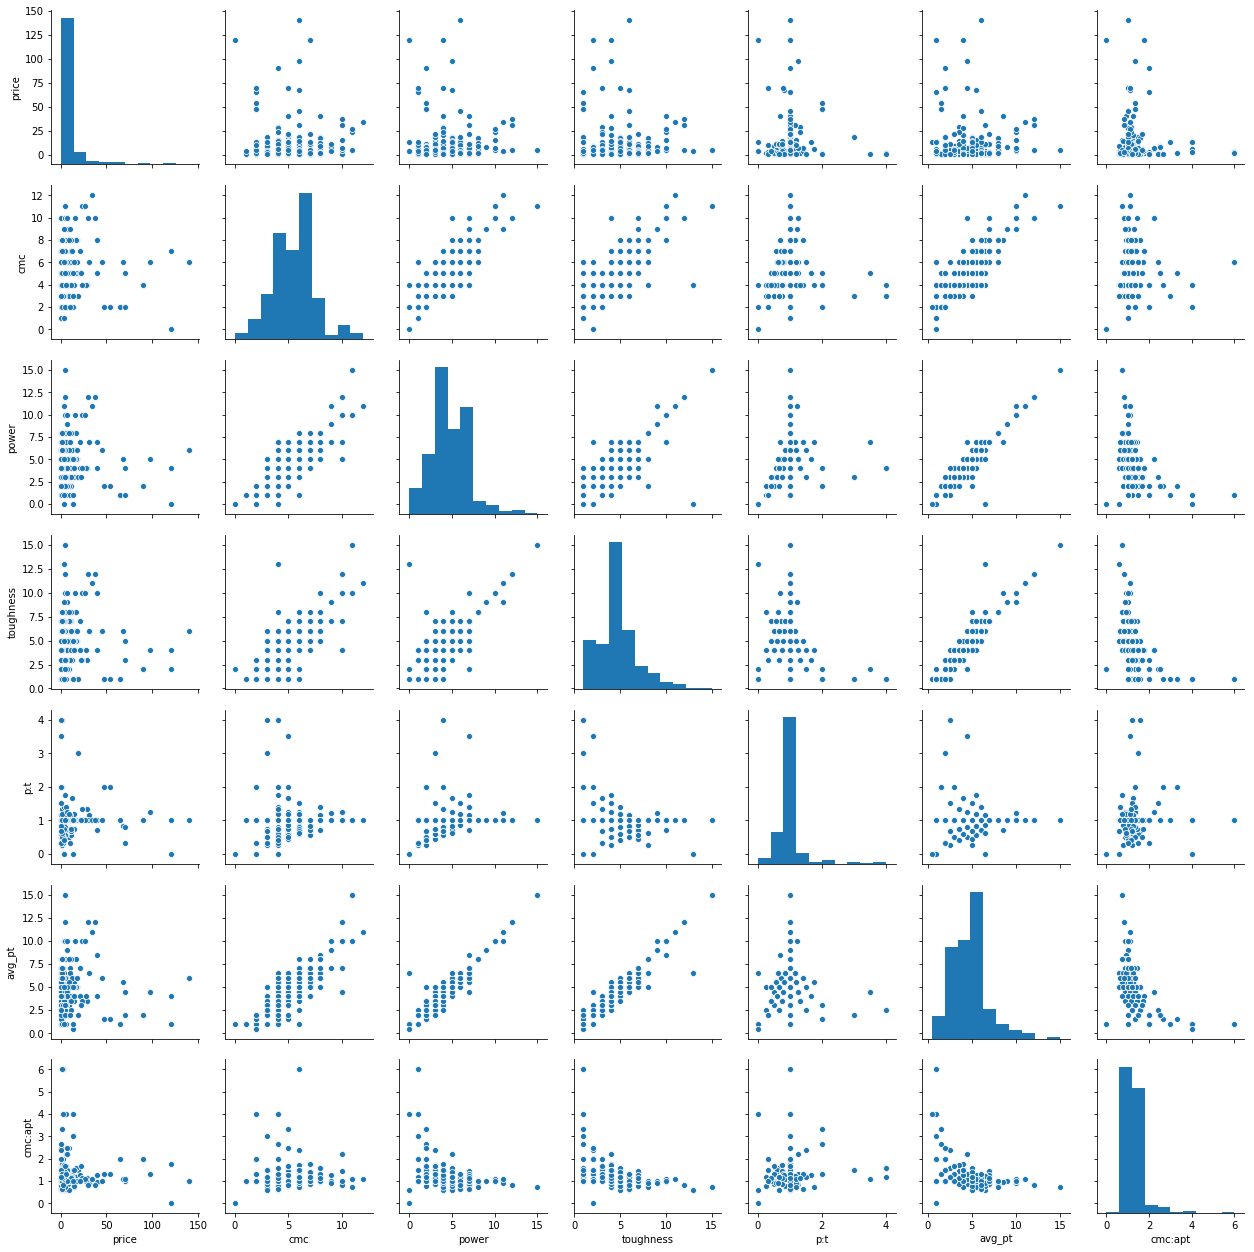

In [15]:
features = ['price','cmc','power','toughness','p:t','avg_pt','cmc:apt']
sns.pairplot(perfected_form[perfected_form['pt_type']=='static'][features].astype(float))

In [16]:
perfected_form[perfected_form['price']>100][['cardname','setname','price','timestamp']]

,cardname,setname,price,timestamp
165,Wurmcoil Engine,Kaladesh Inventions,140.0,1528417917077
168,Sword of War and Peace,Kaladesh Inventions,120.0,1528417917077
173,Platinum Angel,Kaladesh Inventions,120.0,1529109117077
176,Paradox Engine,Kaladesh Inventions,115.0,1529083915410
177,Ornithopter,Kaladesh Inventions,120.0,1528417917077
178,Oblivion Stone,Kaladesh Inventions,105.0,1528417917077
181,Chalice of the Void,Kaladesh Inventions,204.5,1529109117069
183,Arcbound Ravager,Kaladesh Inventions,180.0,1528417917069
185,Sword of Fire and Ice,Kaladesh Inventions,170.0,1529070462264
186,Sword of Feast and Famine,Kaladesh Inventions,149.0,1528465662264


In [17]:
connection = connect_mystic()

http://gatherer.wizards.com/Pages/Card/Details.aspx?multiverseid=409796

http://gatherer.wizards.com/Pages/Card/Details.aspx?multiverseid=414346   

In [18]:
cards_df = pd.read_csv('data/all_vintage_cards.csv')
cards_df.rename(index=str, columns={"name": "cardname", "set_name": "setname"}, inplace=True)
cards_df.head()

C:\Users\alexg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities
0,ff92804a-0c62-4eb8-bbba-f1ca6f426b6e,"Urborg, Tomb of Yawgmoth",Ultimate Box Topper,Legendary Land,NaN,mythic,Each land is a Swamp in addition to its other ...,NaN,NaN,NaN,0.0,puma,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
1,5e63fd70-ca5b-45fd-b551-9ebe02410e9c,Stirring Wildwood,Ultimate Box Topper,Land,NaN,mythic,Stirring Wildwood enters the battlefield tappe...,NaN,NaN,NaN,0.0,puma,"['G', 'W']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
2,54f41726-e0bb-4154-a2db-4b68b50f5032,Raging Ravine,Ultimate Box Topper,Land,NaN,mythic,Raging Ravine enters the battlefield tapped.\r...,NaN,NaN,NaN,0.0,puma,"['G', 'R']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
3,7c9fb3d9-e018-4aa3-9c14-1a51fae176b4,Lavaclaw Reaches,Ultimate Box Topper,Land,NaN,mythic,Lavaclaw Reaches enters the battlefield tapped...,NaN,NaN,NaN,0.0,puma,"['B', 'R']",[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."
4,ff790ded-af9f-4e93-84b7-ddadff5ccad4,Karakas,Ultimate Box Topper,Legendary Land,NaN,mythic,{T}: Add {W}.\r\n{T}: Return target legendary ...,NaN,NaN,NaN,0.0,puma,['W'],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal..."


In [19]:
cards_df.merge(filled_df, on=['cardname', 'setname'])

NameError: name 'filled_df' is not defined

In [ ]:
rarities = ['mythic','rare', 'uncommon', 'common']
for rarity in rarities:
    print('writing {} prices to csv'.format(rarity))
    price_df = get_recent_prices(rarity)
    merged_df = cards_df.merge(price_df, on=['cardname', 'setname'])
    merged_df.to_csv(path_or_buf='data/all_vintage_cards-{}_recent.csv'.format(rarity))

### Ready for Mythic MVP

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [21]:
raw_mythic = pd.read_csv('data/all_vintage_cards-mythic_recent.csv')
raw_mythic.drop(columns='Unnamed: 0', inplace=True)
raw_mythic.set_index('id', inplace=True)

raw_mythic = raw_mythic[(raw_mythic['setname']!='Kaladesh Inventions') & (raw_mythic['setname']!='Zendikar Expeditions')]

abberant_researcher = CreatureFeatureTransformer()
planeswalker = PlaneswalkerTransformer()
raw_mythic_eng = aberrant_researcher.transform(raw_mythic)
raw_mythic_eng = planeswalker.transform(raw_mythic_eng)
raw_mythic_eng.head(10)

,cardname,setname,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,...,reprint,layout,legalities,timestamp,price,pt_type,p:t,avg_pt,cmc:apt,l_type
id,,,,,,,,,,,,,,,,,,,,,
ba9d2384-5c3f-4eb1-86b4-26ee13f1c767,"Chandra, Bold Pyromancer",Dominaria,Legendary Planeswalker — Chandra,{4}{R}{R},mythic,"+1: Add {R}{R}. Chandra, Bold Pyromancer deals...",0,0,5,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1541350580379,5.0,none,NaN,NaN,NaN,static
eb2b7388-ac6b-45c0-a5cc-da6450724b59,"Teferi, Timebender",Dominaria,Legendary Planeswalker — Teferi,{4}{W}{U},mythic,+2: Untap up to one target artifact or creatur...,0,0,5,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780379,5.0,none,NaN,NaN,NaN,static
d4581fc0-551c-4ee5-bde0-65c2b8cdf1b7,Weatherlight,Dominaria,Legendary Artifact — Vehicle,{4},mythic,Flying\r\r\nWhenever Weatherlight deals combat...,4,5,0,4.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780377,0.5,static,0.8,4.5,0.888889,variable
66024e69-ad60-4c9a-a0ca-da138d33ad80,Mox Amber,Dominaria,Legendary Artifact,{0},mythic,{T}: Add one mana of any color among legendary...,0,0,0,0.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780376,6.8,none,NaN,NaN,NaN,variable
5d10b752-d9cb-419d-a5c4-d4ee1acb655e,"Teferi, Hero of Dominaria",Dominaria,Legendary Planeswalker — Teferi,{3}{W}{U},mythic,+1: Draw a card. At the beginning of the next ...,0,0,4,5.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,47.0,none,NaN,NaN,NaN,static
c654737d-34ac-42ff-ae27-3a3bbb930fc1,"Muldrotha, the Gravetide",Dominaria,Legendary Creature — Elemental Avatar,{3}{B}{G}{U},mythic,"During each of your turns, you may play up to ...",6,6,0,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,3.5,static,1.0,6.0,1.000000,variable
73cf8c6b-1322-4bc5-a604-6e372607fae4,"Jhoira, Weatherlight Captain",Dominaria,Legendary Creature — Human Artificer,{2}{U}{R},mythic,"Whenever you cast a historic spell, draw a car...",3,3,0,4.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780374,1.4,static,1.0,3.0,1.333333,variable
9459ffca-5a1f-4641-88d4-8a499b261faa,Darigaaz Reincarnated,Dominaria,Legendary Creature — Dragon,{4}{B}{R}{G},mythic,"Flying, trample, haste\r\r\nIf Darigaaz Reinca...",7,7,0,7.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780373,0.4,static,1.0,7.0,1.000000,variable
5233ad7b-2903-4736-b13a-5cd4a275eb61,"Multani, Yavimaya's Avatar",Dominaria,Legendary Creature — Elemental Avatar,{4}{G}{G},mythic,"Reach, trample\r\r\nMultani, Yavimaya's Avatar...",0,0,0,6.0,...,False,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",1542041780372,1.7,variable,NaN,NaN,NaN,variable


In [22]:
raw_mythic_eng['reprint'] = 1*raw_mythic_eng['reprint']
clean_mythic_eng = raw_mythic_eng.fillna(value=-1)
clean_mythic_eng = pd.get_dummies(clean_mythic_eng, columns=['rarity','layout','pt_type','l_type'], prefix='mvp')
drop_features = ['cardname','setname','type_line','mana_cost','oracle_text','set','colors','color_identity','legalities','timestamp','price']

y = clean_mythic_eng['price']
X = clean_mythic_eng.drop(columns=drop_features)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

gbr = GradientBoostingRegressor()
MVP_model = gbr.fit(X_train,y_train)

In [24]:
y_pred = MVP_model.predict(X_test)

results_df = X_test.merge(clean_mythic_eng, left_index=True, right_index=True)
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['diff'] = np.abs(y_pred-y_test)

results_df.head()
results_df[['cardname','pred','actual','diff']].sample(50)

,cardname,pred,actual,diff
id,,,,
75b83fe5-fd00-4532-bc67-07836abfc99c,Lord of the Void,5.206073,3.0,2.206073
0020a124-ba76-4d40-84e9-9803268d9f16,World Breaker,3.911604,2.0,1.911604
19d2671c-39bd-4dd7-ac97-9cdf5c2cb149,Sidar Kondo of Jamuraa,3.637133,2.5,1.137133
f8965a3a-93fe-4021-a665-b6013bdc86f7,Polyraptor,5.566168,2.3,3.266168
5feddbd0-3d29-4428-b70d-107c1e26930d,Admonition Angel,3.576174,5.1,1.523826
6a494b35-44d4-45e3-abfa-eb1874c6aa21,Maelstrom Wanderer,7.780557,4.7,3.080557
cdd32ec2-02a8-41fc-bf45-c9585bb2b3ee,Massacre Wurm,4.893049,9.6,4.706951
bfe3329c-7faa-4925-b9d2-075a1ab27e80,Natural Order,7.468619,14.0,6.531381
f54eb705-6326-4bac-bf0e-68d42db7a270,"Brimaz, King of Oreskos",3.489029,7.7,4.210971


In [25]:
feature_imporances = np.array([list(X.columns), list(MVP_model.feature_importances_)]).T
feature_imporances[feature_imporances[:,1].argsort()[::-1]]

array([['mvp_none', '5.789294890097012e-06'],
       ['cmc', '0.4699817180910677'],
       ['loyalty', '0.13148134773526093'],
       ['p:t', '0.12034201777253072'],
       ['reprint', '0.08308313016227553'],
       ['cmc:apt', '0.07132888931283304'],
       ['avg_pt', '0.0373652079062437'],
       ['mvp_variable', '0.033935440408902305'],
       ['power', '0.02253953127069637'],
       ['toughness', '0.01341379335585206'],
       ['mvp_saga', '0.012845719325952734'],
       ['mvp_normal', '0.0024051978864374794'],
       ['mvp_variable', '0.0006918909851542894'],
       ['mvp_static', '0.0005803264919028732'],
       ['mvp_leveler', '0.0'],
       ['mvp_static', '0.0'],
       ['mvp_mythic', '0.0']], dtype='<U21')

### Try fitting model to rares

In [30]:
raw_rare = pd.read_csv('data/all_vintage_cards-rare_recent.csv')
raw_rare.drop(columns='Unnamed: 0', inplace=True)
raw_rare.drop_duplicates(inplace=True)
raw_rare.set_index('id', inplace=True)

raw_rare = raw_rare[(raw_rare['setname']!='Kaladesh Inventions') & (raw_rare['setname']!='Zendikar Expeditions') & (raw_rare['setname']!='Portal Three Kingdoms')]

abberant_researcher = CreatureFeatureTransformer()
planeswalker = PlaneswalkerTransformer()
raw_rare_eng = aberrant_researcher.transform(raw_rare)
raw_rare_eng = planeswalker.transform(raw_rare_eng)
raw_rare_eng.head(10)

raw_rare_eng['reprint'] = 1*raw_rare_eng['reprint']
clean_rare_eng = raw_rare_eng.fillna(value=-1)
clean_rare_eng = pd.get_dummies(clean_rare_eng, columns=['rarity','layout','pt_type','l_type'], prefix='mvp')
drop_features = ['cardname','setname','type_line','mana_cost','oracle_text','set','colors','color_identity','legalities','timestamp','price']

y = clean_rare_eng['price']
X = clean_rare_eng.drop(columns=drop_features)

X_train, X_test, y_train, y_test = train_test_split(X, y)

gbr = GradientBoostingRegressor()
MVP_model = gbr.fit(X_train,y_train)

y_pred = MVP_model.predict(X_test)

results_df = X_test.merge(clean_rare_eng, left_index=True, right_index=True)
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['diff'] = np.abs(y_pred-y_test)

results_df.head()
results_df[['cardname','pred','actual','diff']].sample(50)

,cardname,pred,actual,diff
id,,,,
8ba873c1-f1ff-49f2-9e0d-bc9d52f94d76,"Brago, King Eternal",1.975375,1.5,0.475375
8936bf9d-c973-4bce-b5c2-2a01b7953638,Harsh Mentor,4.057140,0.1,3.957140
42237c1d-5579-4c15-b97b-bcaaaf0b1ab2,Saheeli's Artistry,5.857895,0.1,5.757895
44c15156-b942-4919-abee-c379570f8a0c,Terastodon,-1.676999,0.4,2.076999
0164e2ed-b722-4a7d-a4fb-5401af008cbf,Rude Awakening,4.245791,0.5,3.745791
4216656e-90e8-45fc-a0f6-0d0d79d0a021,Shelldock Isle,8.259867,5.3,2.959867
d40ab3e7-9abb-4acc-9932-de03b533722f,Wave of Terror,5.912376,0.4,5.512376
b902b972-3a93-4e4e-aa77-02ada81e6b95,Pendrell Mists,11.110428,12.7,1.589572
869e27e3-1707-4e1d-b04a-8309da2e41b4,Plague Boiler,-0.069864,0.2,0.269864


In [32]:
feature_importances = np.array([list(X.columns), list(MVP_model.feature_importances_)]).T
feature_importances[feature_imporances[:,1].argsort()[::-1]]

array([['mvp_none', '0.006472378244770587'],
       ['cmc', '0.2715265079846004'],
       ['loyalty', '0.0'],
       ['p:t', '0.178183958846628'],
       ['reprint', '0.07052720323487242'],
       ['cmc:apt', '0.21264543514412626'],
       ['avg_pt', '0.1253954036579453'],
       ['mvp_variable', '0.01330264435290483'],
       ['power', '0.037890885711626146'],
       ['toughness', '0.07821026872131519'],
       ['mvp_saga', '0.003177413657792172'],
       ['mvp_normal', '0.0'],
       ['mvp_variable', '0.0'],
       ['mvp_static', '0.0'],
       ['mvp_leveler', '0.0'],
       ['mvp_static', '0.0026679004434187505'],
       ['mvp_rare', '0.0']], dtype='<U21')

### PIPELINING

In [174]:
from sklearn.pipeline import Pipeline
from model.master_transmuter import *

In [185]:
raw_mythic = pd.read_csv('data/all_vintage_cards-mythic_recent.csv')

# drop sets, drop duplicates, set indices
X, y = csv_cleaner(raw_mythic)

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([
    ('CreatureFeature', CreatureFeatureTransformer()),
    ('Planeswalker', PlaneswalkerTransformer()),
    ('BoolToInt', BoolTransformer()),
    ('Fillna', FillTransformer()),
    ('DeriveFeatures', DeriveFeaturesTransformer()),
    ('DropFeatures', DropFeaturesTransformer()),
    ('CreateDummies', CreateDummiesTransformer()),
    ('TestFill', TestFillTransformer()),
    ('GradientBoostingRegressor', GradientBoostingRegressor())
])

y_train_log = np.log(y_train) 
y_test_log = np.log(y_test)

pipe.fit(X_train, y_train_log)
y_pred_log = pipe.predict(X_test)
y_pred = price_corrector(np.exp(y_pred_log))

In [186]:
results_df = X_test.copy()
results_df['pred'] = y_pred
results_df['actual'] = y_test
results_df['log_diff'] = np.abs(np.log(y_pred+1) - np.log(y_test+1))
score = log_score(y_pred, y_test)
print('Model log score: {}'.format(score))
results_df[['cardname','pred','actual','log_diff']].sort_values('log_diff')

Model log score: 0.7707297255072431


,cardname,pred,actual,log_diff
id,,,,
04f3db71-802f-488c-b40d-ac90df2d660a,"Rakdos, Lord of Riots",1.6,1.5,0.039221
69c8fcdb-4798-4961-995a-e128a3ff431a,"Lazav, Dimir Mastermind",1.4,1.5,0.040822
fc3a4e7d-6667-4c2f-b6b4-484f401b0455,Soulfire Grand Master,1.3,1.4,0.042560
bf472be9-f375-455e-a800-7af5258f4e59,Ob Nixilis of the Black Oath,5.4,5.1,0.048009
84d70487-21d1-4897-ac20-2a996e893b5b,"Nahiri, the Harbinger",5.1,5.5,0.063513
ca204351-7a7e-4e4b-8c2b-f90fa0f9d724,Vizier of the Menagerie,3.4,3.1,0.070618
63d25986-2d71-43b8-b660-502acef9a70c,Krond the Dawn-Clad,1.7,1.4,0.117783
170926b9-4bfa-4a9b-a297-db1672bc48d9,"Muzzio, Visionary Architect",1.9,2.3,0.129212
36ed9f9d-99a7-49f4-b0ad-d71355809d32,Hazoret the Fervent,2.4,2.9,0.137201


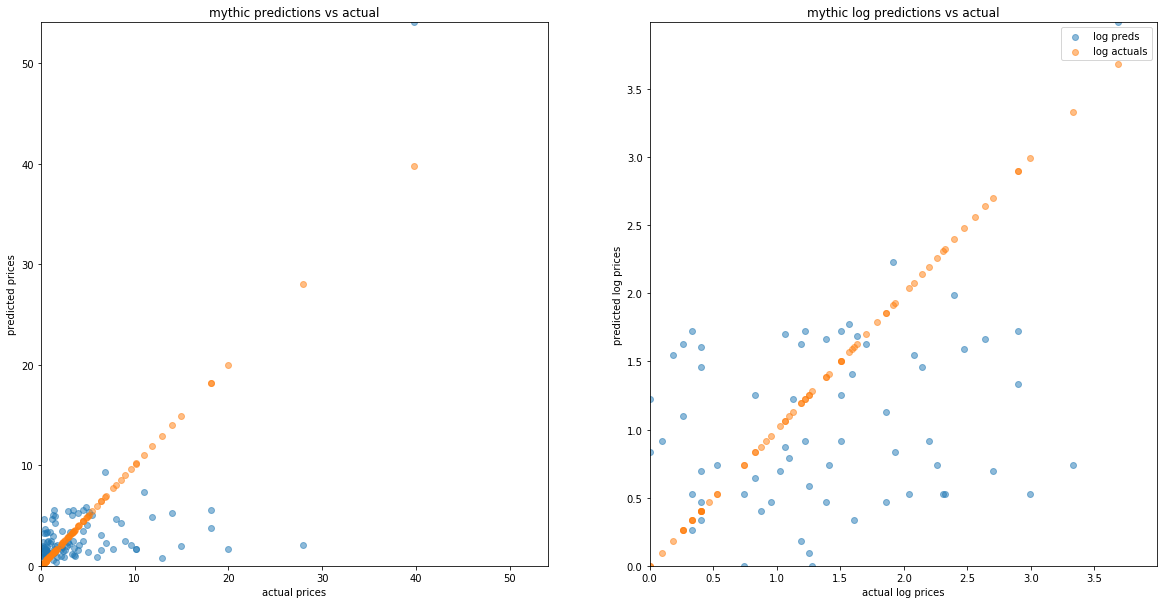

In [197]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
lin_ax = axs[0]
log_ax = axs[1]

lin_ax.scatter(y_test, y_pred, label='preds', alpha=0.5)
lin_ax.scatter(y_test, y_test, label='actuals', alpha=0.5)
lin_ax.set_title('mythic predictions vs actual')
lin_ax.set_ylabel('predicted prices')
lin_ax.set_xlabel('actual prices')
lin_ax.set_xlim(0,max(y_test.max(), y_pred.max()))
lin_ax.set_ylim(0,max(y_test.max(), y_pred.max()))


log_ax.scatter(np.log(y_test), np.log(y_pred), label='log preds', alpha=0.5)
log_ax.scatter(np.log(y_test), np.log(y_test), label='log actuals', alpha=0.5)
log_ax.set_title('mythic log predictions vs actual')
log_ax.set_ylabel('predicted log prices')
log_ax.set_xlabel('actual log prices')
log_ax.set_xlim(0,max(np.log(y_test).max(), np.log(y_pred).max()))
log_ax.set_ylim(0,max(np.log(y_test).max(), np.log(y_pred).max()))

plt.legend()

In [201]:
feature_importances = pipe.named_steps['GradientBoostingRegressor'].feature_importances_


array([6.22352471e-02, 4.19921354e-02, 6.35563242e-02, 1.44671130e-01,
       3.20245561e-02, 1.20816515e-01, 5.89486065e-02, 2.33274595e-01,
       0.00000000e+00, 1.99040190e-01, 0.00000000e+00, 2.31565682e-02,
       0.00000000e+00, 0.00000000e+00, 1.20192358e-02, 4.49820851e-06,
       0.00000000e+00, 6.43389853e-03, 1.82649979e-03])

In [206]:
pipe.steps[:-1]

[('CreatureFeature', CreatureFeatureTransformer()),
 ('Planeswalker', PlaneswalkerTransformer()),
 ('BoolToInt', BoolTransformer()),
 ('Fillna', FillTransformer()),
 ('DeriveFeatures', DeriveFeaturesTransformer()),
 ('DropFeatures', DropFeaturesTransformer()),
 ('CreateDummies', CreateDummiesTransformer()),
 ('TestFill', TestFillTransformer())]

In [216]:
from model.models import *

In [260]:
rarity = 'mythic'
raw_df = pd.read_csv('data/all_vintage_cards-{}_recent.csv'.format(rarity))

# drop sets, drop duplicates, set indices
X, y = csv_cleaner(raw_df)
# y = y*100
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

mythic basic pipeline score: 0.7064184548353738


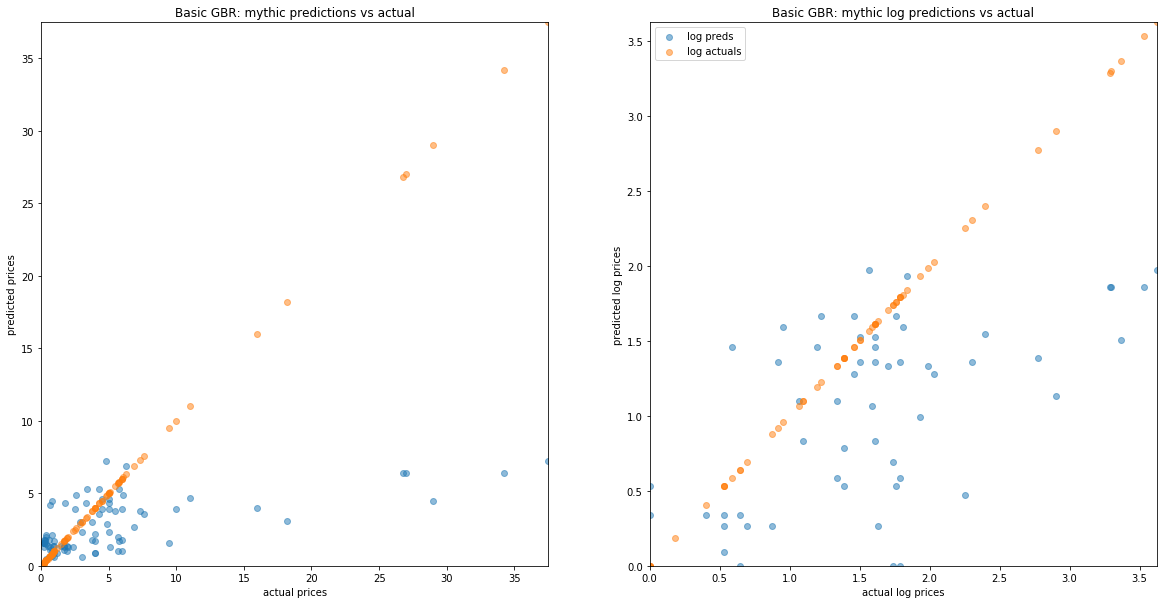

In [261]:
pipe, results_df, score = fit_basic_pipeline(X_train, X_test, y_train, y_test)
print('{0} basic pipeline score: {1}'.format(rarity,score))
plot_residuals(results_df['y_pred'],results_df['y_test'], 'Basic GBR: '+rarity)

mythic basline (log mean) score: 0.8901999520498922


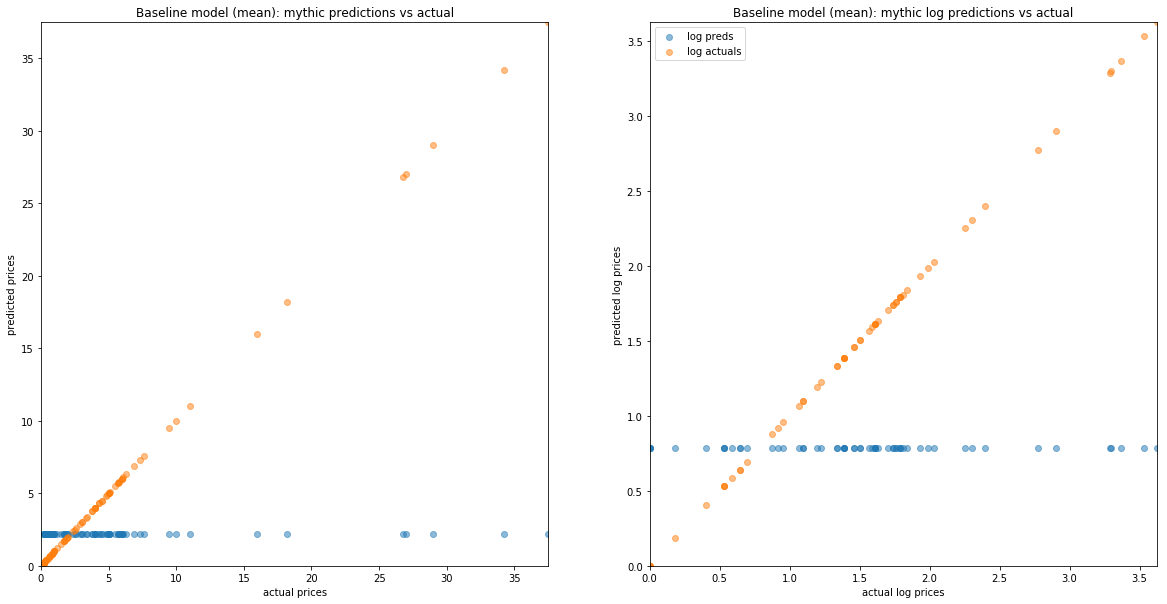

In [262]:
results_df, score = baseline_model(X_train, X_test, y_train, y_test)
print('{0} basline (log mean) score: {1}'.format(rarity,score))
plot_residuals(results_df['y_pred'],results_df['y_test'], 'Baseline model (mean): '+rarity)